In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hollywood_movies=pd.read_csv('moviedata.csv')
print(hollywood_movies.head(5))

print(hollywood_movies['exclude'].value_counts())

hollywood_movies=hollywood_movies.drop('exclude', axis=1)

   Year  exclude                                         Film  Lead Studio  \
0  2011      NaN                                      Average          NaN   
1  2011      NaN                             The Tree Of Life  Independant   
2  2011      NaN                            Midnight in Paris         Sony   
3  2011      NaN  Harry Potter and the Deathly Hallows Part 2  Warner Bros   
4  2011      NaN                      Twilight: Breaking Dawn  Independant   

   Critic Rating  Audience Rating      Story    Genre  \
0          52.84            61.42        NaN      NaN   
1          84.00            61.00  Discovery    Drama   
2          93.00            84.00       Love  Romance   
3          96.00            92.00    Rivalry  Fantasy   
4          26.00            68.00       Love  Romance   

   Opening Weekend Theaters  Opening Weekend per Cinema  Domestic Gross  \
0                   2810.31                     8764.92           61.33   
1                      4.00           

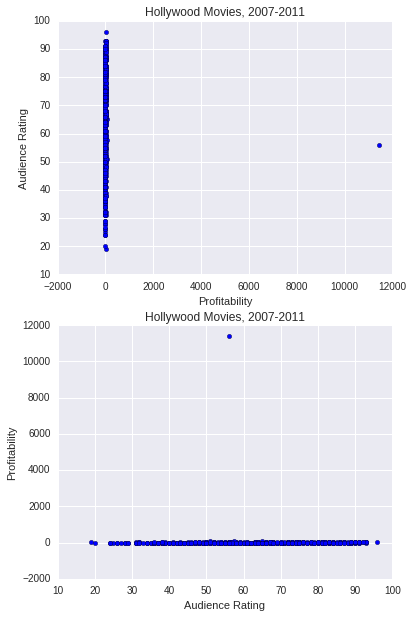

In [2]:
fig=plt.figure(figsize=(6,10))

ax1=fig.add_subplot(2,1,1)
ax1.scatter(hollywood_movies['Profitability'], hollywood_movies['Audience Rating'])
ax1.set_xlabel('Profitability')
ax1.set_ylabel('Audience Rating')
ax1.set_title('Hollywood Movies, 2007-2011')

ax2=fig.add_subplot(2,1,2)
ax2.scatter(hollywood_movies['Audience Rating'], hollywood_movies['Profitability'])
ax2.set_xlabel('Audience Rating')
ax2.set_ylabel('Profitability')
ax2.set_title('Hollywood Movies, 2007-2011')

plt.show()

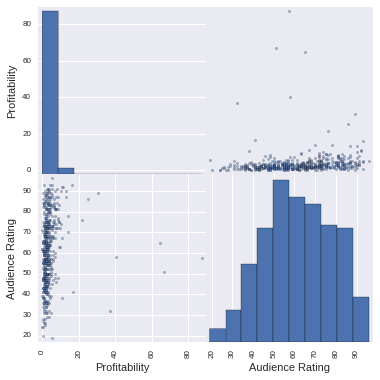

In [3]:
from pandas.tools.plotting import scatter_matrix

normal_movies= hollywood_movies[hollywood_movies['Film']!= 'Paranormal Activity']

scatter_matrix(normal_movies[['Profitability','Audience Rating']],figsize=(6,6))
plt.show()

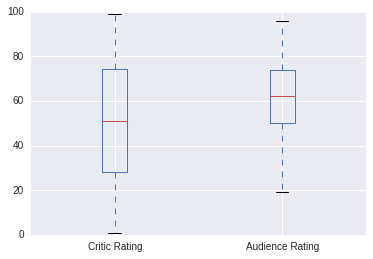

In [4]:
normal_movies[['Critic Rating','Audience Rating']].plot(kind='box')
plt.show()

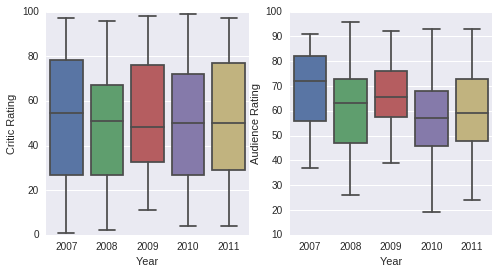

In [5]:
normal_movies=normal_movies.sort_values('Year')
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
ax1=sns.boxplot(x=normal_movies['Year'],y=normal_movies['Critic Rating'])


ax2=fig.add_subplot(1,2,2)
ax2=sns.boxplot(x=normal_movies['Year'],y=normal_movies['Audience Rating'])

plt.show()

True     447
False     69
Name: Profitable, dtype: int64


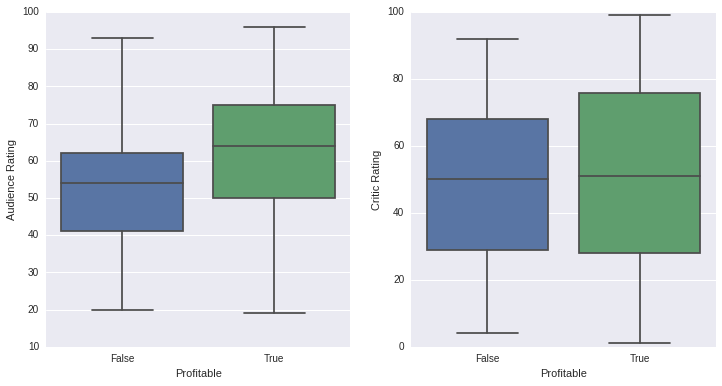

In [6]:
def is_profitable(row):
    if row["Profitability"] <= 1.0:
        return False
    return True
normal_movies["Profitable"] = normal_movies.apply(is_profitable, axis=1)
print(normal_movies["Profitable"].value_counts())

fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.boxplot(data=normal_movies,x='Profitable',y='Audience Rating',ax=ax1)
sns.boxplot(data=normal_movies,x='Profitable',y='Critic Rating',ax=ax2)

plt.show()